<div style="text-align: center;">
  <img width="240" height="240" src="https://www.naterscreations.com/imputegap/logo_imputegab.png" />
</div>
<h1>ImputeGAP: Tutorial Notebook</h1>




Notebook 4: Downstream

# 1.&nbsp;Installation


ImputeGAP is a comprehensive end-to-end imputation library that covers the whole imputation workflow, from data collection to explaining the results and their implications. It consists of two interconnected components: the imputation module and the advanced analysis module. These components can be used together through a standardized and configuration-based pipeline, or separately via independent instantiation. The documentation is available on: https://imputegap.readthedocs.io/

This notebook showcases key steps of the imputation: imputation pipeline synthesis and advanced analysis. Before getting started, please make sure to install the library along with the required Jupyter dependencies:

In [ ]:
%pip install imputegap==1.1.2

In [ ]:
%pip install -U ipywidgets

In [3]:
import pandas as pd
def imputegap_jupyter(matrix):
    df = pd.DataFrame(matrix).head(10).reset_index(drop=True)
    df.index += 1  # Start index at 1 instead of 0
    return df.style.format(precision=2)

# 7.&nbsp;Downstream Analysis


ImputeGAP includes a dedicated module for systematically evaluating the impact of data imputation on downstream tasks. Currently, forecasting is the primary supported task, with plans to expand to additional tasks in the future, such as classification and anomaly detection

All downstream models implemented in ImputeGAP are available in the `ts.forecasting_models` module and can be listed as follows:

In [79]:
ts.forecasting_models

['arima',
 'croston',
 'deepar',
 'ets',
 'exp-smoothing',
 'hw-add',
 'lightgbm',
 'lstm',
 'naive',
 'nbeats',
 'prophet',
 'sf-arima',
 'theta',
 'transformer',
 'unobs',
 'xgboost']

We show how ImputeGAP evaluates the downstream impact of CDRec in comparison to ZeroImpute (which fills missing values with zeros) on the DeepAR forecasting model.

In [80]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.contamination import GenGap
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()
print(f"\nImputeGAP downstream models for forcasting : {ts.forecasting_models}")

# load and normalize the dataset
ts.load_series(utils.search_path("forecast-economy"), normalizer="z_score")

# contaminate the time series
ts_m = GenGap.aligned(ts.data, rate_series=0.7)

# define and impute the contaminated series
imputer = Imputation.MatrixCompletion.CDRec(ts_m)
imputer.impute()

# compute and print the downstream results
downstream_config = {"task": "forecast", "model": "prophet", "baseline": "ZeroImpute", "split": 0.8}
imputer.score(ts.data, imputer.recov_data, downstream=downstream_config)
ts.print_results(imputer.downstream_metrics, text="Downstream results")


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


ImputeGAP downstream models for forcasting : ['arima', 'croston', 'deepar', 'ets', 'exp-smoothing', 'hw-add', 'lightgbm', 'lstm', 'naive', 'nbeats', 'prophet', 'sf-arima', 'theta', 'transformer', 'unobs', 'xgboost']

(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/forecast-economy.txt

> logs: normalization (z_score) of the data - runtime: 0.0004 seconds

(CONT) missigness pattern: ALIGNED
	percentage of contaminated series: 20.0%
	rate of missing data per series: 70.0%
	security offset: [0-94]
	timestamps impacted : 94 -> 744
	series impacted : 0 -> 3


(IMPUTATION) CDRec
	Matrix: 931, 16
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

call: cdrec.impute(params={'rank': 3, 'epsilon': 1e-06, 'iterations': 100})

> logs: imputation cdrec - Execution Time: 2.0500 seconds.


(DOWNSTREAM) Default parameters of the downstream model loaded.


16:17:44 - cmdstanpy - INFO - Chain [1] start processing
16:17:44 - cmdstanpy - INFO - Chain [1] done processing
16:17:44 - cmdstanpy - INFO - Chain [1] start processing
16:17:44 - cmdstanpy - INFO - Chain [1] done processing
16:17:44 - cmdstanpy - INFO - Chain [1] start processing
16:17:44 - cmdstanpy - INFO - Chain [1] done processing


plots saved in:  /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/imputegap_assets/downstream

Downstream results :
MSE_original         = 0.9068209167491901
MSE_cdrec            = 0.9086036902520218
MSE_zeroimpute       = 0.9367010057574212
sMAPE_original       = 193.3773675181798
sMAPE_cdrec          = 193.52210241476573
sMAPE_zeroimpute     = 197.54965786640582


In [81]:
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


Results (cdrec) :
MSE_original         = 0.9068209167491901
MSE_cdrec            = 0.9086036902520218
MSE_zeroimpute       = 0.9367010057574212
sMAPE_original       = 193.3773675181798
sMAPE_cdrec          = 193.52210241476573
sMAPE_zeroimpute     = 197.54965786640582


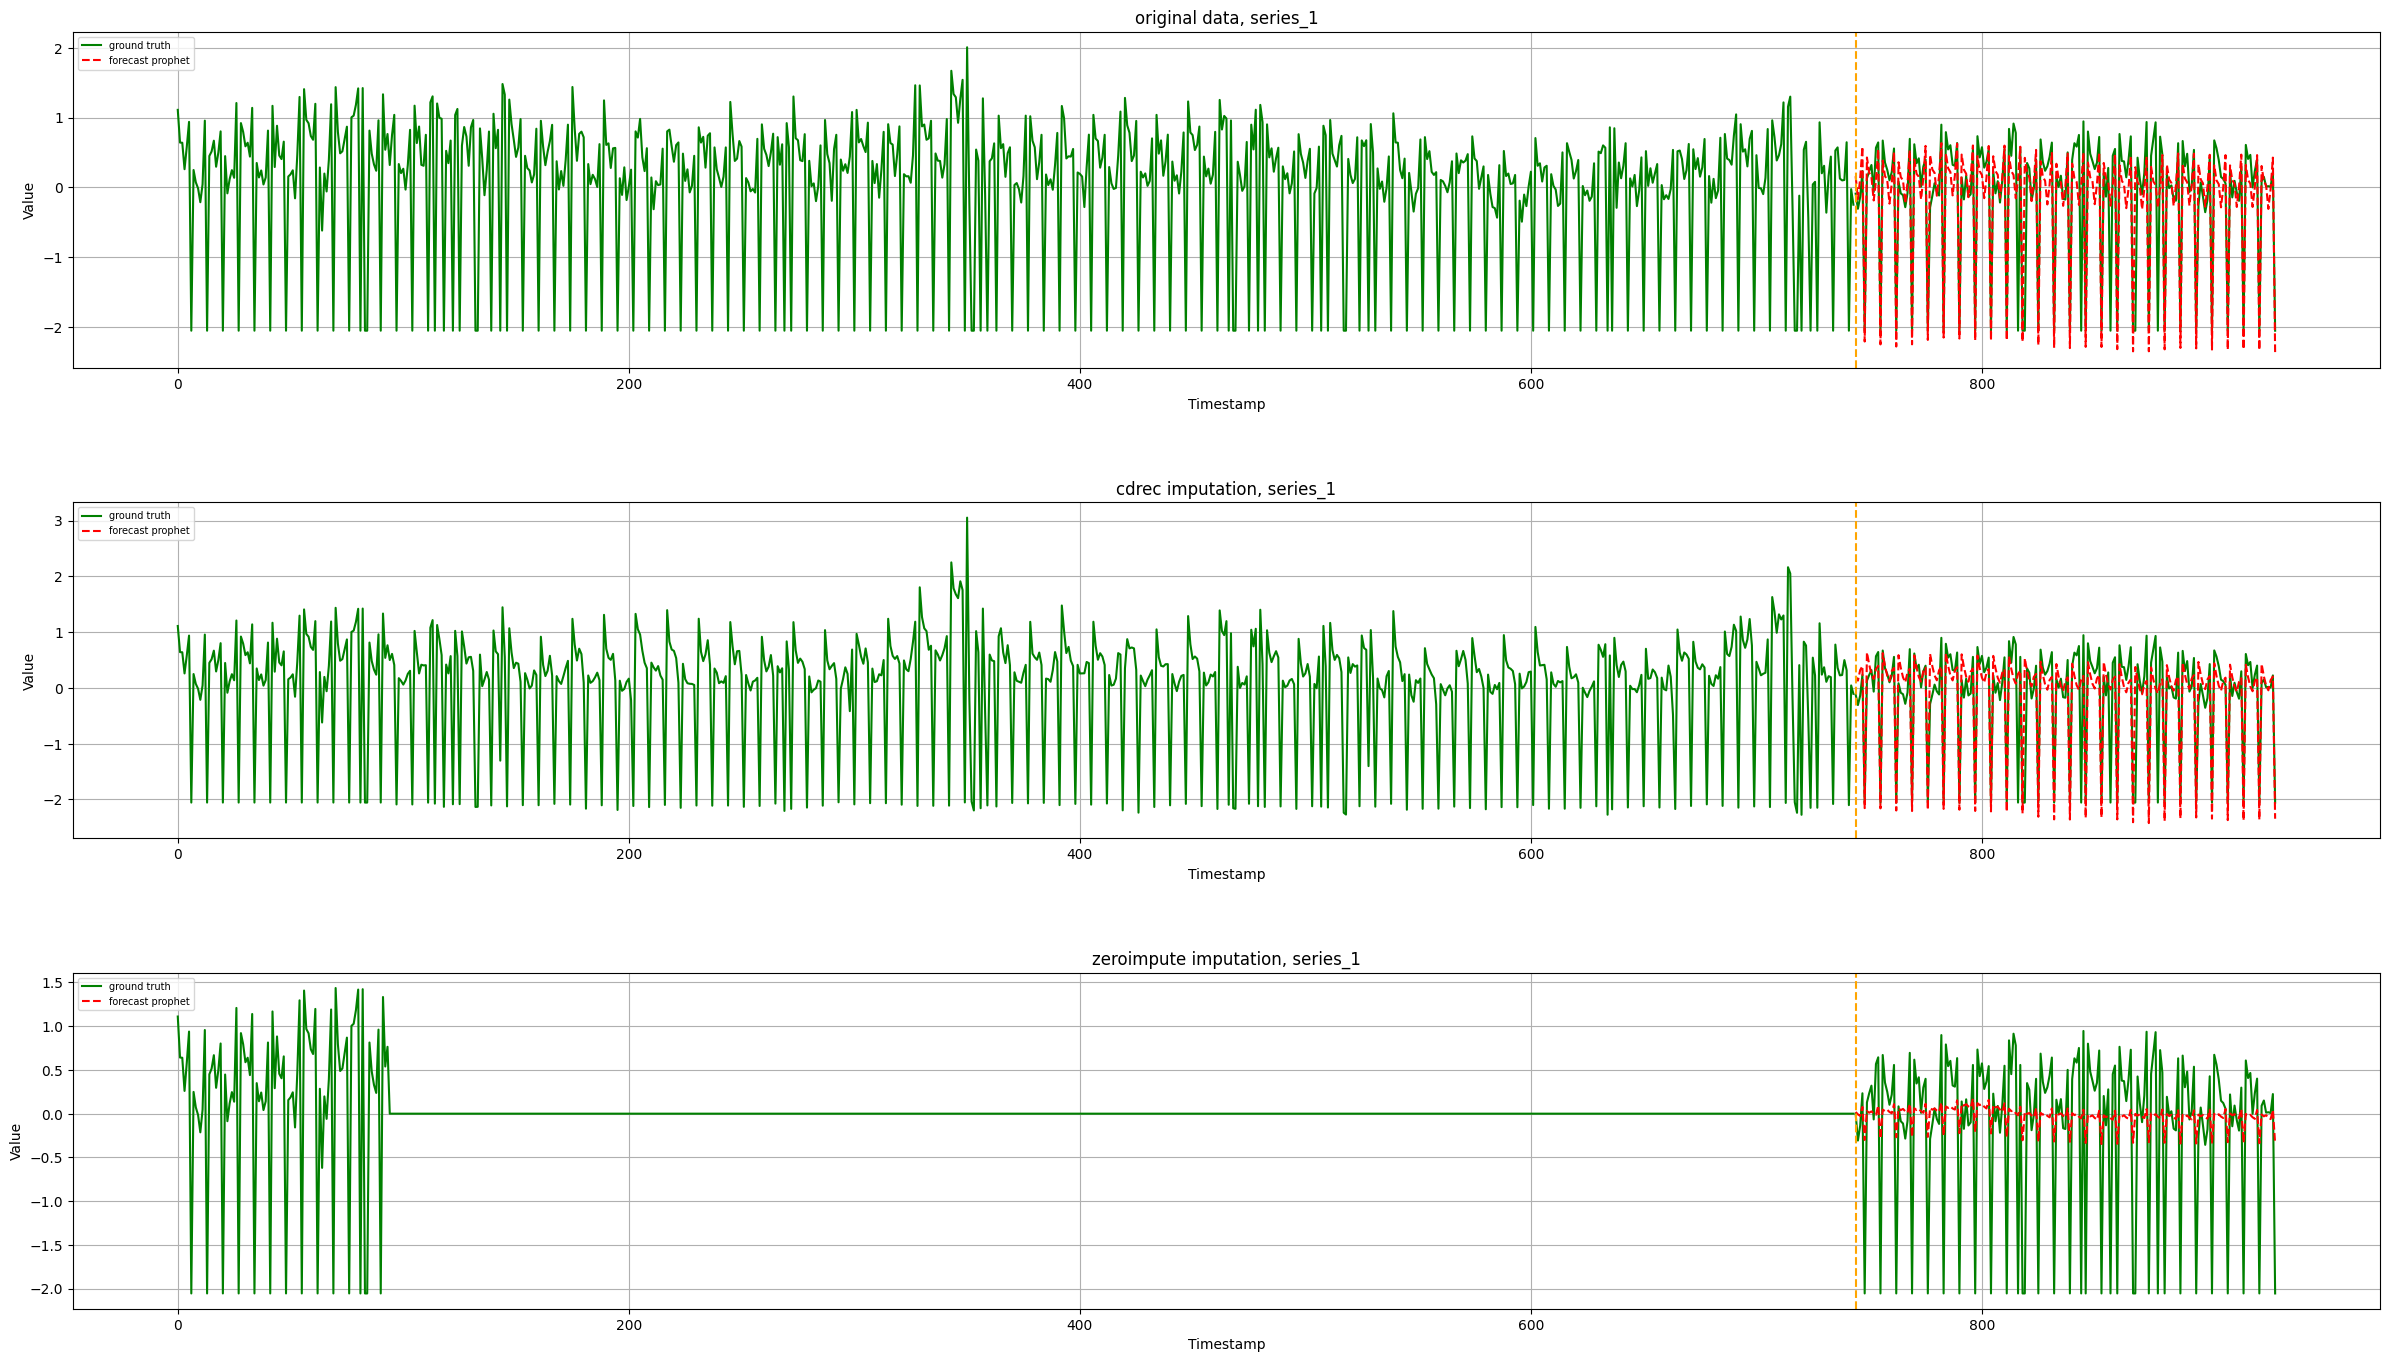

In [82]:
%matplotlib inline
imputer.downstream_plot.show()

Let's try a new forecaster

In [85]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.contamination import GenGap
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the timeseries
ts.load_series(utils.search_path("forecast-economy"))
ts.normalize()

# contaminate the time series
ts_m = GenGap.aligned(ts.data, rate_series=0.7)

# define and impute the contaminated series
imputer = Imputation.MatrixCompletion.CDRec(ts_m)
imputer.impute()

# compute and print the downstream results
downstream_config = {"task": "forecast", "model": "lightgbm", "baseline": "ZeroImpute"}
imputer.score(ts.data, imputer.recov_data, downstream=downstream_config)
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/forecast-economy.txt

> logs: normalization (z_score) of the data - runtime: 0.0010 seconds
> logs: normalization (z_score) of the data - runtime: 0.0003 seconds

(CONT) missigness pattern: ALIGNED
	percentage of contaminated series: 20.0%
	rate of missing data per series: 70.0%
	security offset: [0-94]
	timestamps impacted : 94 -> 744
	series impacted : 0 -> 3


(IMPUTATION) CDRec
	Matrix: 931, 16
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

call: cdrec.impute(params={'rank': 3, 'epsilon': 1e-06, 'iterations': 100})

> logs: imputation cdrec - Execution Time: 2.6332 seconds.


(DOWNSTREAM) Default parameters of the downstream model loaded.

(DOWNSTREAM) Analysis launched !
	task: forecast
	model: lightgbm
	params: {'lags': 7, 'verbose': -1}
	base algorithm: cdrec
	reference algorithm:

In [86]:
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


Results (cdrec) :
MSE_original         = 0.28137521171347346
MSE_cdrec            = 0.834597856534711
MSE_zeroimpute       = 1.2030677902499716
sMAPE_original       = 88.76308704807344
sMAPE_cdrec          = 131.49679314775756
sMAPE_zeroimpute     = 124.92917985410949


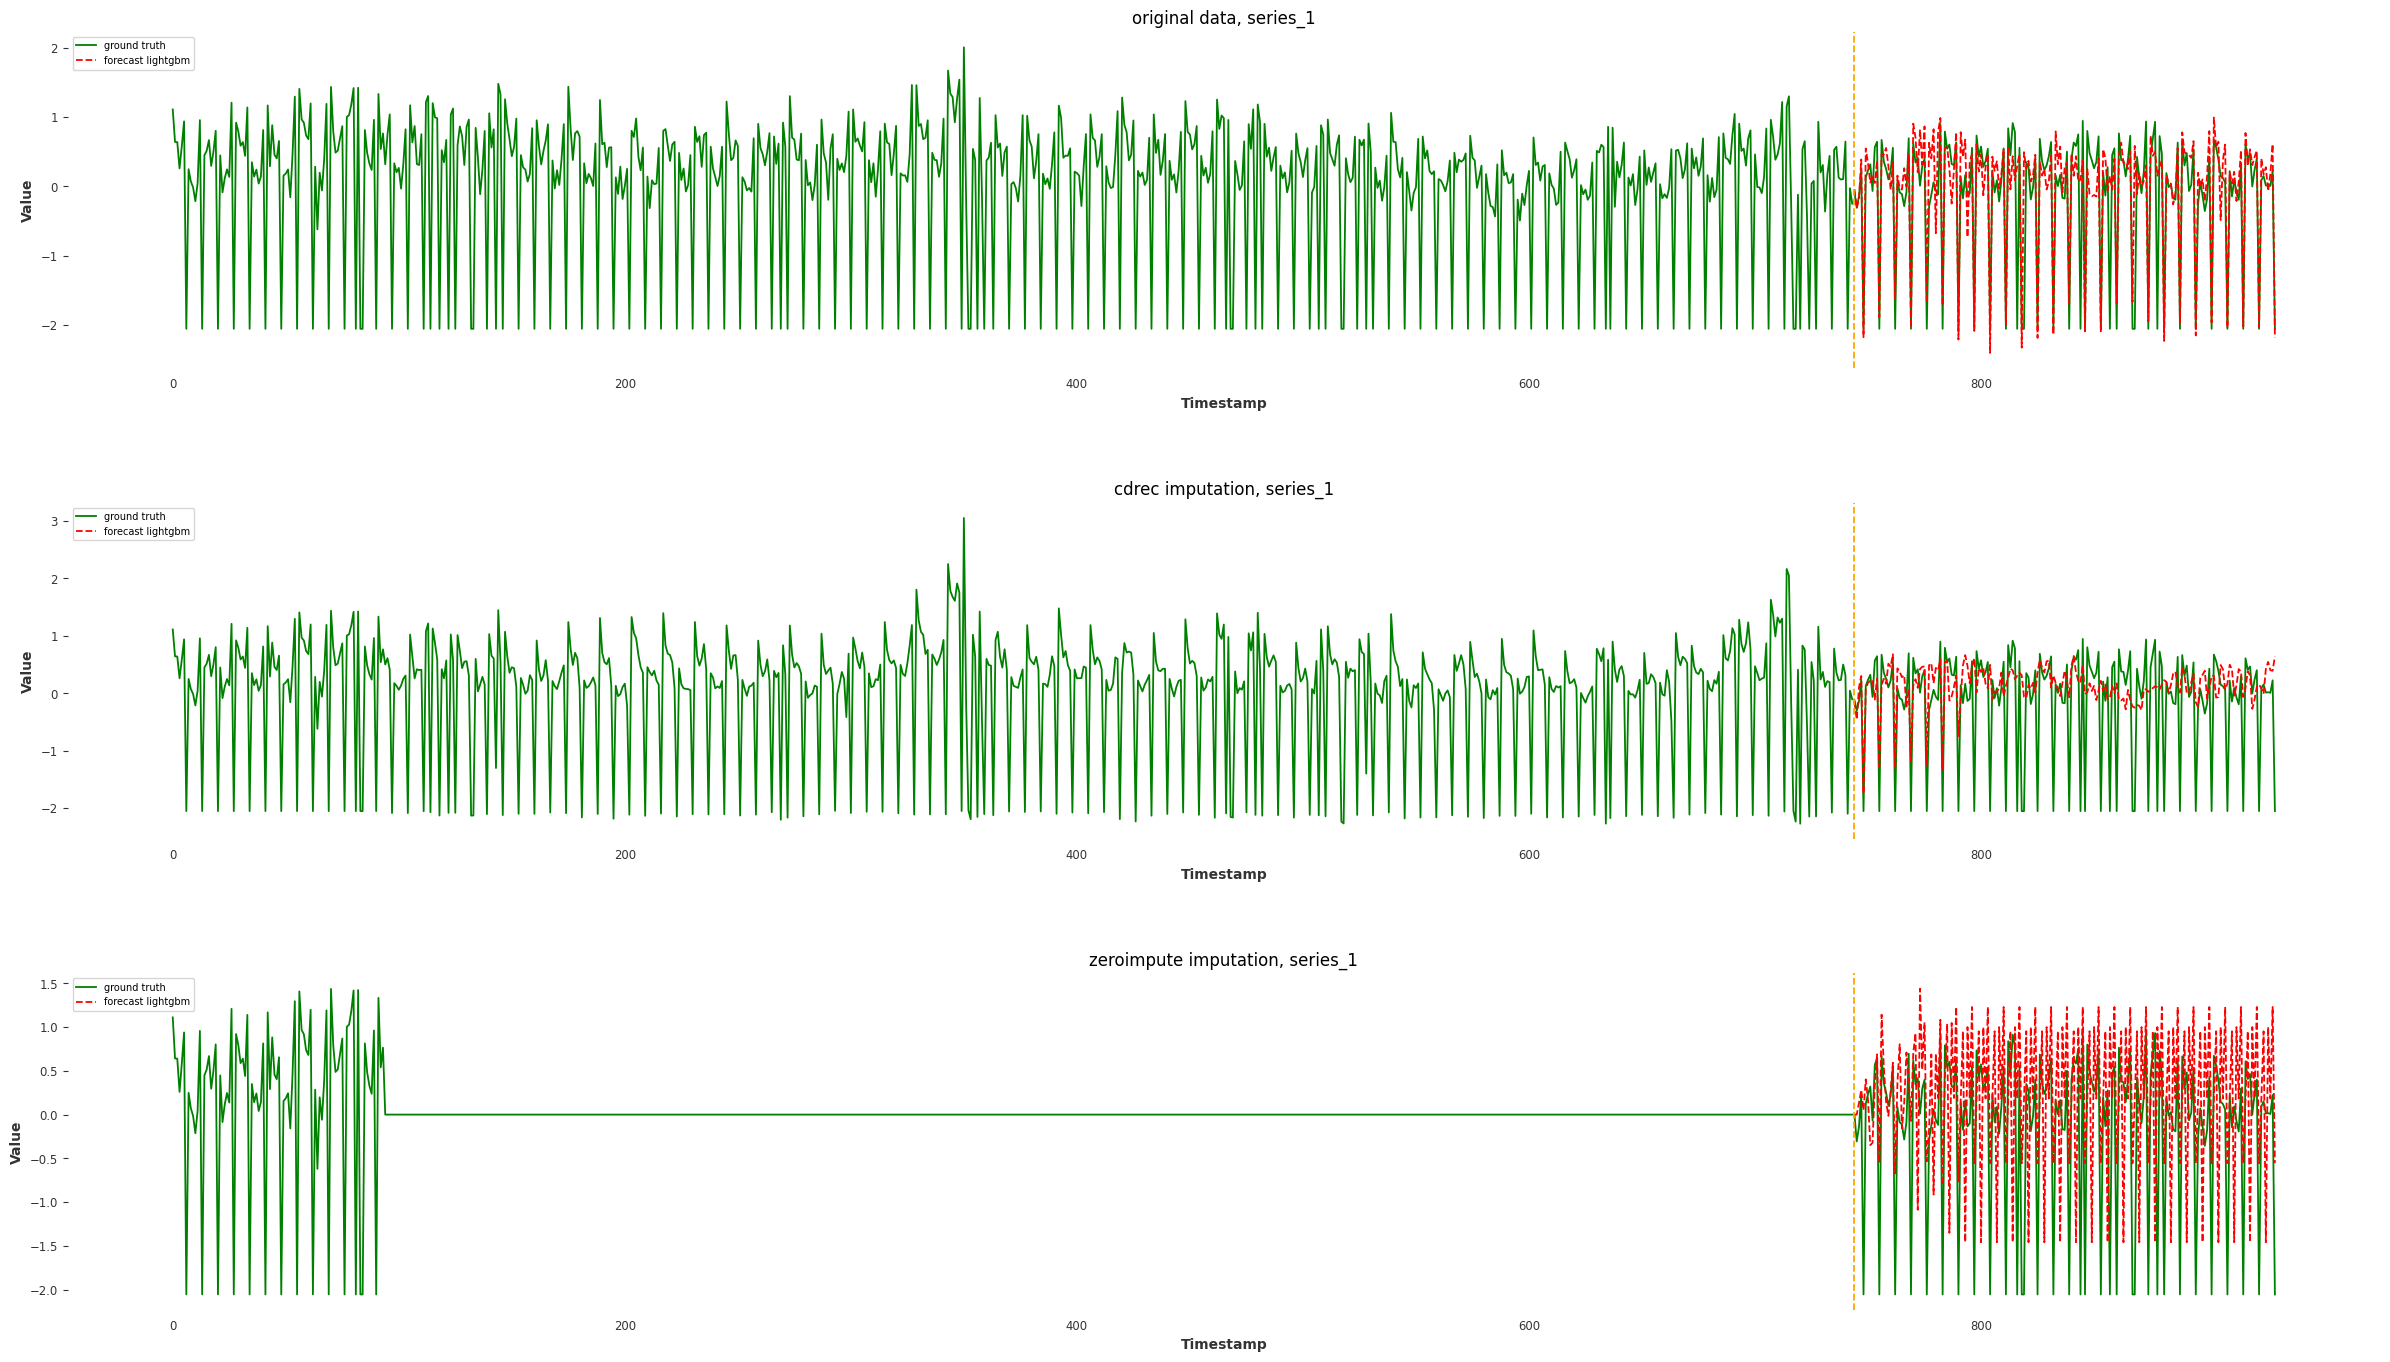

In [87]:
%matplotlib inline
imputer.downstream_plot.show()

Let's compare 2 Matri Completion algorithms

In [88]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.contamination import GenGap
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the timeseries
ts.load_series(utils.search_path("forecast-economy"))
ts.normalize()

# contaminate the time series
ts_m = GenGap.aligned(ts.data, rate_series=0.8)

# define and impute the contaminated series
imputer = Imputation.MatrixCompletion.IterativeSVD(ts_m)
imputer.impute()

# compute and print the downstream results
downstream_config = {"task": "forecast", "model": "lightgbm", "baseline": "SoftImpute"}
imputer.score(ts.data, imputer.recov_data, downstream=downstream_config)
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/forecast-economy.txt

> logs: normalization (z_score) of the data - runtime: 0.0004 seconds
> logs: normalization (z_score) of the data - runtime: 0.0003 seconds

(CONT) missigness pattern: ALIGNED
	percentage of contaminated series: 20.0%
	rate of missing data per series: 80.0%
	security offset: [0-94]
	timestamps impacted : 94 -> 837
	series impacted : 0 -> 3


(SYS) Inner files loaded :  /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/env/default_values.toml 


(SYS) Wrapper files loaded for C++ :  {PosixPath('/mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/algorithms/lib/lib_iterative_svd.so')} 

		(C++) Iterative-SVD: Matrix Shape: (931, 16) for Rank 3...

> logs: imputation iterative svd - Execution Time: 0.0351 seconds



(DOWNSTREAM) Default param

In [89]:
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


Results (iterative_svd) :
MSE_original         = 0.28137521171347346
MSE_iterative_svd    = 0.6340501784940268
MSE_softimpute       = 0.7855610916367414
sMAPE_original       = 88.76308704807344
sMAPE_iterative_svd  = 102.60616615641455
sMAPE_softimpute     = 116.05473389745623


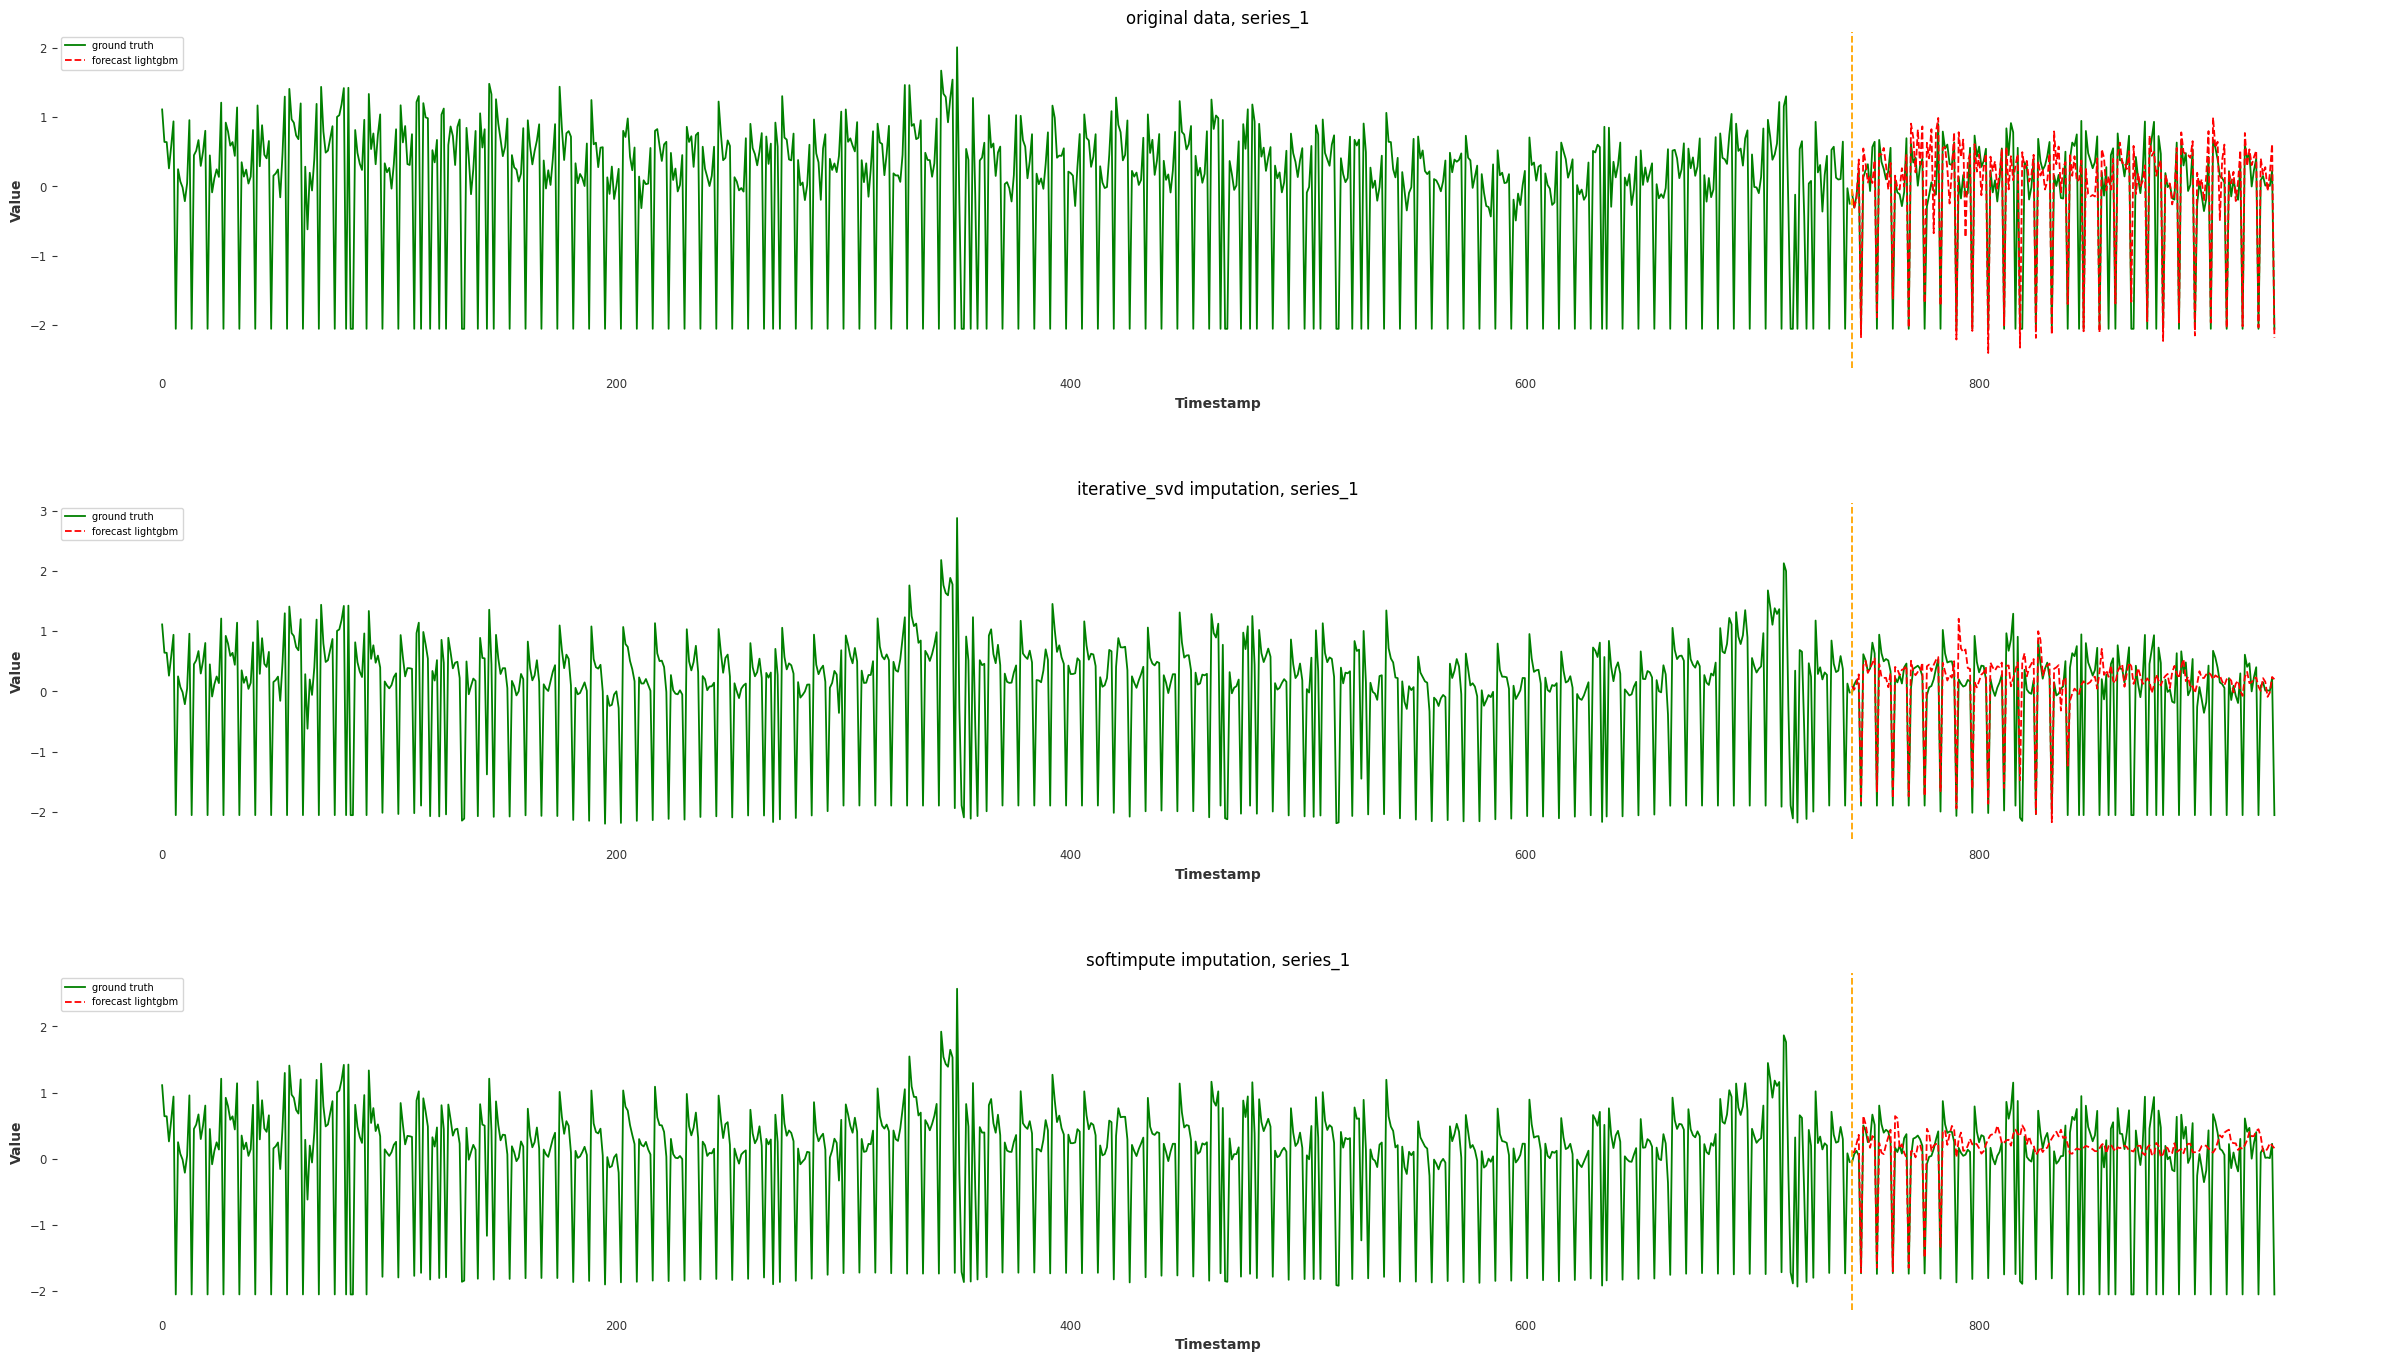

In [90]:
%matplotlib inline
imputer.downstream_plot.show()

<br>
More KDD tutorials: https://imputegap-tutorials.github.io/KDD-2025/html/slides_codes.html